# The purpose of this project is to build a model that can predict if a player will be an NBA all-star

## 1.0 Import Libraries/Data

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
plt.style.use('classic')
from sklearn.model_selection import train_test_split
sns.set_style()
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



## 1.1 Import data

In [2]:
# Load in the Data
df_20 = pd.read_csv('stats.csv',header = 1).drop(['RANK','TEAM','POS','AGE','GP','FTA','2PA','3PA'],axis = 1)
df_19 = pd.read_csv('2019-2020.csv',header = 1).drop(['RANK','TEAM','POS','AGE','GP','FTA','2PA','3PA'],axis = 1)
df_20.columns = ['Name','MPG','MIN%','USG%','TO%','FT%','2P%','3P%','eFG%','TS%','PPG','RPG','TRB%','APG','AST%','SPG','BPG','TOPG','VI','ORTG','DRTG']
df_19.columns = ['Name','MPG','MIN%','USG%','TO%','FT%','2P%','3P%','eFG%','TS%','PPG','RPG','TRB%','APG','AST%','SPG','BPG','TOPG','VI','ORTG','DRTG']

## 2.0 Preprocessing Data

In [3]:
df_20.sort_values(['PPG','APG'],ascending= False)
df_20.dropna(subset = ['ORTG','DRTG','eFG%','TO%','TS%'], inplace = True)
df_19.sort_values(['PPG','APG'],ascending= False)
df_19.dropna(subset = ['ORTG','DRTG','eFG%','TO%','TS%'], inplace = True)

In [4]:
df_20.columns

Index(['Name', 'MPG', 'MIN%', 'USG%', 'TO%', 'FT%', '2P%', '3P%', 'eFG%',
       'TS%', 'PPG', 'RPG', 'TRB%', 'APG', 'AST%', 'SPG', 'BPG', 'TOPG', 'VI',
       'ORTG', 'DRTG'],
      dtype='object')

In [5]:
df_20.iloc[:,0]

0               Bradley Beal
1              Stephen Curry
2                Joel Embiid
3                Luka Doncic
4      Giannis Antetokounmpo
               ...          
593            Javonte Green
596               Tyler Cook
597             Jared Dudley
603         Ignas Brazdeikis
607         Anzejs Pasecniks
Name: Name, Length: 576, dtype: object

In [6]:
ser = pd.Series([10,10,10,10])

In [7]:
def s_sum(x):
    if x.empty:
        return None
    else:
        x = x.dropna()
        return np.sum(x)

In [8]:
df_20.iloc[0,2]

74.3

In [9]:
df_20.iloc[1,2]

70.9

In [10]:
df_20

,Name,MPG,MIN%,USG%,TO%,FT%,2P%,3P%,eFG%,TS%,...,RPG,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG
0,Bradley Beal,35.6,74.3,34.3,11.0,0.900,0.540,0.350,0.536,0.598,...,4.8,7.1,4.5,22.4,1.17,0.36,3.23,9.9,113.7,110.3
1,Stephen Curry,34.0,70.9,33.7,12.5,0.918,0.572,0.428,0.613,0.662,...,5.5,8.6,5.7,30.5,1.17,0.13,3.35,11.7,119.6,109.3
2,Joel Embiid,31.7,66.1,35.5,11.8,0.851,0.541,0.375,0.545,0.636,...,10.8,18.8,3.0,17.2,1.05,1.42,3.09,12.4,121.7,100.2
3,Luka Doncic,35.1,73.1,35.9,15.3,0.730,0.570,0.359,0.557,0.593,...,7.9,12.4,8.7,44.3,1.00,0.61,4.34,14.3,114.4,107.2
4,Giannis Antetokounmpo,33.7,70.1,32.6,14.0,0.685,0.633,0.305,0.598,0.633,...,11.4,17.8,6.0,29.1,1.21,1.29,3.65,14.8,120.4,101.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,Javonte Green,4.9,10.2,16.2,31.1,1.000,0.143,0.000,0.125,0.225,...,1.0,11.4,0.3,6.9,0.29,0.29,0.57,4.6,52.0,104.7
596,Tyler Cook,4.2,8.6,10.5,25.0,0.000,0.333,0.000,0.333,0.333,...,0.5,6.7,0.5,14.5,0.00,0.00,0.25,4.8,88.0,108.1
597,Jared Dudley,6.9,14.4,5.1,22.2,0.000,0.000,0.400,0.429,0.429,...,1.7,13.9,0.5,8.1,0.09,0.09,0.18,4.4,106.5,100.1
603,Ignas Brazdeikis,7.9,16.5,16.3,0.0,0.000,0.000,0.000,0.000,0.000,...,2.0,13.9,0.0,0.0,0.00,0.00,0.00,0.0,0.0,110.9


In [11]:
df_20 = df_20.groupby('Name',as_index=False).agg(np.mean)

In [12]:
df_20

,Name,MPG,MIN%,USG%,TO%,FT%,2P%,3P%,eFG%,TS%,...,RPG,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG
0,Aaron Gordon,27.85,58.10,20.60,14.15,0.678,0.5565,0.3440,0.545,0.5705,...,5.7,11.1,3.3,17.55,0.700,0.665,1.96,8.90,110.95,109.45
1,Aaron Holiday,17.00,35.40,19.90,11.40,0.809,0.3940,0.3680,0.461,0.4940,...,1.2,3.8,1.6,13.20,0.640,0.170,0.90,5.60,97.20,110.00
2,Aaron Nesmith,13.10,27.30,13.20,12.80,0.700,0.4870,0.3410,0.504,0.5240,...,2.4,10.0,0.4,3.50,0.320,0.240,0.51,4.70,102.00,104.00
3,Abdel Nader,14.80,30.80,18.90,12.60,0.757,0.5340,0.4190,0.569,0.6050,...,2.6,9.8,0.8,7.40,0.420,0.380,0.79,6.50,110.30,103.10
4,Adam Mokoka,4.40,9.20,17.60,14.00,0.000,0.7500,0.1000,0.417,0.4070,...,0.4,5.3,0.4,12.70,0.170,0.080,0.25,5.40,83.10,107.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,Yogi Ferrell,15.00,31.25,21.95,6.05,0.500,0.3335,0.4165,0.501,0.5260,...,1.9,5.8,2.9,33.35,0.915,0.250,0.75,7.75,123.85,109.30
499,Yuta Watanabe,13.70,28.50,12.50,10.00,0.826,0.5070,0.4140,0.563,0.5880,...,3.1,12.7,0.7,7.20,0.470,0.420,0.40,6.10,118.60,106.20
500,Zach LaVine,35.20,73.40,31.20,14.40,0.848,0.5720,0.4160,0.594,0.6330,...,5.1,8.1,5.1,24.10,0.810,0.510,3.64,10.20,114.30,110.00
501,Zeke Nnaji,9.30,19.30,12.90,6.80,0.800,0.6410,0.3920,0.611,0.6310,...,1.5,9.2,0.2,2.60,0.130,0.110,0.18,4.20,123.90,109.90


In [13]:
df_20[df_20['Name'] == 'James Harden']

,Name,MPG,MIN%,USG%,TO%,FT%,2P%,3P%,eFG%,TS%,...,RPG,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG
215,James Harden,36.8,76.6,28.8,17.0,0.875,0.552,0.354,0.541,0.6145,...,6.9,10.25,10.7,45.5,1.07,0.715,4.17,13.25,120.3,110.7


In [14]:
# List with all stars
all_stars_20 =['Kevin Durant','Bradley Beal','Kyrie Irving','Kawhi Leonard','Jayson Tatum','Zion Williamson','Mike Conley','James Harden','Zach LaVine','Donovan Mitchell','Julius Randle','Nikola Vucevic','Devin Booker','Anthony Davis','Joel Embiid','LeBron James','Giannis Antetokounmpo','Stephen Curry','Luka Doncic','Nikola Jokic','Jaylen Brown','Paul George','Rudy Gobert','Damian Lillard','Domantas Sabonis','Chris Paul','Ben Simmons']
all_stars_19 = ['Kemba Walker','Trae Young','Giannis Antetokounmpo', 'Pascal Siakam','Joel Embiid','Kyle Lowry','Ben Simmons','Jimmy Butler','Khris Middleton','Bam Adebayo','Jayson Tatum','Domantas Sabonis','James Harden','Luka Doncic','LeBron James','Kawhi Leonard','Anthony Davis','Chris Paul','Russell Westbrook','Damian Lillard','Donovan Mitchell','Brandon Ingram', 'Nikola Jokic','Rudy Gobert','Devin Booker']
# Creating an All star Column
df_20['Allstar'] = df_20.apply(lambda x: x['Name'] in all_stars_20, axis = 1)
df_19['Allstar'] = df_19.apply(lambda x: x['Name'] in all_stars_19, axis = 1)

# Encoding target column, 1 = all star 0 = not
df_20['Allstar'] = df_20['Allstar'].astype(int)
df_19['Allstar'] = df_19['Allstar'].astype(int)


In [15]:
len(all_stars_20)

27

In [16]:
df_20[df_20['Allstar'] == 1]

,Name,MPG,MIN%,USG%,TO%,FT%,2P%,3P%,eFG%,TS%,...,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG,Allstar
21,Anthony Davis,31.9,66.60,28.60,9.70,0.7090,0.5600,0.2700,0.535,0.5690,...,13.80,2.9,15.90,1.30,1.700,2.040,9.90,111.5,102.4,1
34,Ben Simmons,32.7,68.10,20.80,20.40,0.6100,0.5560,0.3000,0.554,0.5800,...,12.60,7.0,31.60,1.64,0.660,3.240,11.20,112.1,99.8,1
43,Bradley Beal,35.6,74.30,34.30,11.00,0.9000,0.5400,0.3500,0.536,0.5980,...,7.10,4.5,22.40,1.17,0.360,3.230,9.90,113.7,110.3,1
71,Chris Paul,31.8,66.20,22.30,13.90,0.9310,0.5390,0.3850,0.551,0.5930,...,8.20,8.7,39.70,1.44,0.210,2.210,10.90,122.8,105.1,1
89,Damian Lillard,35.8,74.60,31.70,11.80,0.9260,0.5010,0.3730,0.532,0.6040,...,6.20,7.4,34.40,0.93,0.260,3.120,10.70,121.9,116.4,1
125,Devin Booker,33.8,70.50,32.80,12.90,0.8560,0.5410,0.3450,0.534,0.5840,...,6.90,4.4,21.40,0.84,0.280,3.210,9.20,109.0,106.2,1
132,Domantas Sabonis,35.7,74.40,24.20,16.60,0.7310,0.5680,0.3020,0.547,0.5880,...,17.60,6.0,25.20,1.13,0.550,3.360,12.50,113.3,103.5,1
133,Donovan Mitchell,33.4,69.60,33.50,10.70,0.8450,0.4760,0.3860,0.520,0.5690,...,7.00,5.2,26.70,0.98,0.280,2.770,10.10,114.8,105.3,1
172,Giannis Antetokounmpo,33.7,70.10,32.60,14.00,0.6850,0.6330,0.3050,0.598,0.6330,...,17.80,6.0,29.10,1.21,1.290,3.650,14.80,120.4,101.3,1
215,James Harden,36.8,76.60,28.80,17.00,0.8750,0.5520,0.3540,0.541,0.6145,...,10.25,10.7,45.50,1.07,0.715,4.170,13.25,120.3,110.7,1


## 3.0 Feature Engineering

# According to Mathletics
    
    4 Factors for Team offense are:
    * Effective Field Goal Percentage
    * Turnovers Committed per Possession 
    * Offensive Rebounding Percentage
    * Free Throw Rate
    
    4 Factors for Team Defense are:
    * Opponent's Effective Field Goal Percentage
    * Defensive Turnovers Cause per Possession
    * Defensive Rebounding Percentage
    * Openent's Free Throw Rate

### Free Throw percentage = Free Throws Made/Free Throws Attempted

### Free Throw Rate = Free Throws Made/Field Goal Attempts

### Field Goal Attempts = 2PA + 3PA

In [17]:
# Creating Field Goal Attempts, Free Throws Made, and Free Throw Rate Statistics. We will use FTR as a feature!
#df_20['FGA'] = df_20['2PA'] + df_20['3PA']
#df_20['FTM'] = (df_20['FT%']*df_20['FTA']).astype(int)
#df_20['FTR'] = df_20['FTM']/df_20['FGA']

## 4.0 Train Test Split

In [18]:

# Initial Guess at most important features
X = df_20[['PPG','RPG','APG','eFG%','ORTG','DRTG']]
# Target Column is all star since that is what we want to predict
y = df_20['Allstar']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42,test_size = 0.3)


## 5.0 Modeling

We will implement a Random Forest Algorithm, Decision Tree Algorithm, and Naive Bayes Algorithm and select the model with the highest accuracy

In [19]:
# Random Forest Algorithm

clf=RandomForestClassifier(random_state = 40)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9801324503311258


In [20]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9271523178807947


In [21]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(random_state = 40)
DTC.fit(X_train,y_train)
y_pred = DTC.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9668874172185431


# The Random Forest Model performs the best with 97% Accuracy!

In [22]:
# Plot Feature Function to plot the most important features!
def plot_feature_importance(importance, names, model_type,topfeatures):
    
    # Arrays from feature importance and feature naes
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    # Create a df_20 using a dictionary

    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    FI_df_20 = pd.DataFrame(data)

    # Sort df_20 in terms of feature importance
    FI_df_20.sort_values(by = ['feature_importance'], ascending = False, inplace = True)
    
    # Font 
    font = {'fontname': 'Georgia'}
    
    
    
    #Plot Feature Importance Bar Chart
    plt.figure(figsize = (5,5))
    sns.barplot(x = FI_df_20['feature_importance'][:topfeatures], y = FI_df_20['feature_names'][:topfeatures])

    
    plt.title(model_type + ' Feature Importance',**font,fontsize = 20,fontweight="bold")
    plt.xlabel('Feature Importance',**font,fontsize = 15,fontweight="bold")
    plt.ylabel('Feature Names',**font,fontsize = 15,fontweight="bold")
    plt.xticks(**font)
    plt.yticks(**font)

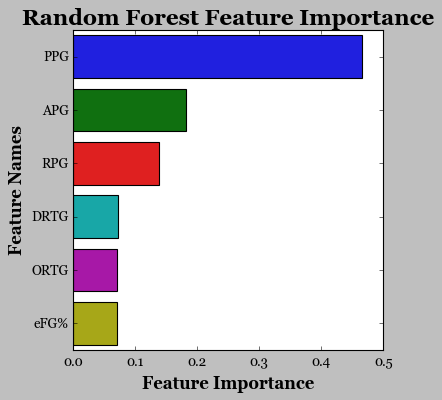

In [23]:
plot_feature_importance(clf.feature_importances_, X.columns, 'Random Forest',10)

### Here we can see that Points per game is the most important feature for predicting an All-Star

## 6.0 Cross Validation/Hyperparameter Tuning

In [24]:
# Parameters

# Trees 
n_estimators = [1,50,1000]
# Features to consider
max_features = ['auto', 'sqrt', 'log2', None]
# Bootstrap or not
bootstrap = [True, False]
# Random State
random_state = [1, 40, 500]

In [25]:
# Create a param grid
param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'bootstrap':bootstrap,
             'random_state': random_state}
param_grid

{'n_estimators': [1, 50, 1000],
 'max_features': ['auto', 'sqrt', 'log2', None],
 'bootstrap': [True, False],
 'random_state': [1, 40, 500]}

# 6.1 Grid Search CV

In [26]:
grid = GridSearchCV(estimator = RandomForestClassifier(),param_grid = param_grid, cv = 3, n_jobs = -1, scoring = 'accuracy')
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

In [27]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'n_estimators': 50,
 'random_state': 1}

In [28]:
print('The Accuracy Score is: ' + str(accuracy_score(y_test,y_pred)))

The Accuracy Score is: 0.9801324503311258


## 7.0 Analysis

After using Grid Search CV for hyperparameter tuning, we achieved 97.7% Test Accuracy on predicting 2021 NBA All Stars. This model could be improved by adding more data prior to the 2021 NBA Season. But that is a project for another day.

In [29]:
from joblib import dump

clf=RandomForestClassifier(random_state = 40).set_params(**grid.best_params_)
clf.fit(X_train,y_train)
#dump(clf, 'rfclf.joblib')
y_pred=clf.predict(X_test)


#print("Accuracy:", metrics.accuracy_score(y_test,y_pred))


In [30]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:

df = pd.DataFrame(
    columns=['PPG', 'RPG', 'APG', 'eFG%', 'ORTG', 'DRTG'],
    data=[[0, 10, 5, 10, 80, 70]]
)

clf = RandomForestClassifier(random_state = 40).set_params(**grid.best_params_)
clf.fit(X_train,y_train)
y_pred_log = clf.predict(df)

if y_pred_log == 1:
    results = 'This player is predicted to be an All-Star!'
else:
    results = 'This player is not predicted to be an All-Star :('
    
print(results)
# y_pred = y_pred_log[0]
# percent_over = ((y_pred - list_price) / list_price) * 100
# per_offer = percent_over / offers
# results = f'The predicted winning bid is ${y_pred:,.0f} which is {percent_over:.2f}% over the asking price or \
#             {per_offer:.2f}% per offer.'


This player is not predicted to be an All-Star :(


In [32]:
y_pred_log

array([0])